#### Using an existing frame work to train our model is a pretty straight forward process

### I Will be using Teansor flow in this notebok

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from time import time

#### I will use a gpu for my training if there is an accessed GPU using the following lines of code 

In [4]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    # TensorFlow has found GPUs
    print(f"TensorFlow has detected {len(gpus)} GPU(s):")
    for gpu in gpus:
        print(f"  - {gpu}")
else:
    print("No GPU(s) found. TensorFlow will use CPU.")

No GPU(s) found. TensorFlow will use CPU.


In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

### I will try to use Convelution neural networks for this notebook 
- Convelution neural networks are typically considered better for using deep learning models with pictures

In [6]:

def plot_convolution(data,t,title=''):  # Defining a function that plots convelutional matrices
    fig, ax = plt.subplots(2,len(data)+1,figsize=(8,3))
    fig.suptitle(title,fontsize=16)
    tt = np.expand_dims(np.expand_dims(t,2),2)
    for i,im in enumerate(data):
        ax[0][i].imshow(im)
        ximg = np.expand_dims(np.expand_dims(im,2),0)
        cim = tf.nn.conv2d(ximg,tt,1,'SAME')
        ax[1][i].imshow(cim[0][:,:,0])
        ax[0][i].axis('off')
        ax[1][i].axis('off')
    ax[0,-1].imshow(t)
    ax[0,-1].axis('off')
    ax[1,-1].axis('off')
    plt.show()

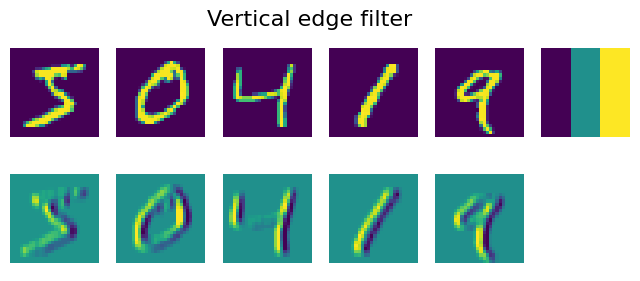

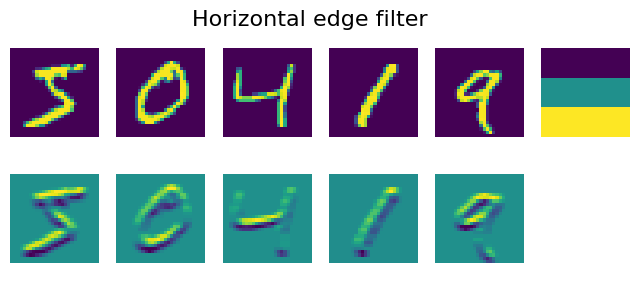

In [7]:
plot_convolution(x_train[:5],[[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]],'Vertical edge filter')
plot_convolution(x_train[:5],[[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]],'Horizontal edge filter')

> I have took the above convelution's plotting function from the [Microsoft ML course Repo](https://github.com/microsoft/ML-For-Beginners) 

#### Now I will define the model i am going to train on the minist dataset

In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=9, kernel_size=(5,5), input_shape=(28,28,1),activation='relu'), # Adding convelutional layers
    keras.layers.Flatten(),
    keras.layers.Dense(10) # 10 for the 10 possoble outputs from 0 to 9
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

model.summary()

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 9)      │           234 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        51,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,084 (203.45 KB)

 Trainable params: 52,084 (203.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
x_train_c = np.expand_dims(x_train,3)
x_test_c = np.expand_dims(x_test,3)
startT = time()
hist = model.fit(x_train_c,y_train,validation_data=(x_test_c,y_test),epochs=5)
endT = time()
print(f"time taken for training: {endT - startT}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.8976 - loss: 0.3579 - val_acc: 0.9747 - val_loss: 0.0856
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.9753 - loss: 0.0837 - val_acc: 0.9787 - val_loss: 0.0657
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.9822 - loss: 0.0602 - val_acc: 0.9809 - val_loss: 0.0594
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.9849 - loss: 0.0497 - val_acc: 0.9837 - val_loss: 0.0558
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.9865 - loss: 0.0462 - val_acc: 0.9822 - val_loss: 0.0552
time taken for training: 13.594083070755005


## The model looks great and we can achieve 0.99 accuracy in such little time